# Final Project Kelas Belajar Machine Learning untuk Pemula
## Image Classification - Rock Paper Scissors
### CNN
oleh

Fitra Anugrah, M.Si

Kota Jakarta Utara, DKI Jakarta

math.fitra@gmail.com

In [1]:
!pip install split_folders

In [2]:
# import library yang diperlukan

import zipfile
import os
import splitfolders
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print('-----DONE-----')

-----DONE-----


In [3]:
# Download dataset rockpaperscissors

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-03 12:15:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  35.2MB/s    in 9.7s    

2020-11-03 12:16:09 (31.7 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# ekstrak file rockpaperscissors.zip

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

print('-----DONE-----')

-----DONE-----


In [5]:
# bagi data set menjadi training set dan validation set dengan ukuran validation set 40% dari total dataset

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output='/tmp/rockpaperscissors', seed=1337, ratio=(.6, .4))

train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors', 'val')

Copying files: 2188 files [00:00, 3144.29 files/s]


In [6]:
# periksa apakah pembagian data berhasil

print('data training = ', len(os.listdir(train_dir +'/rock')) + len(os.listdir(train_dir +'/paper')) + len(os.listdir(train_dir +'/scissors')))
print('data validation = ', len(os.listdir(validation_dir +'/rock')) + len(os.listdir(validation_dir +'/paper')) + len(os.listdir(validation_dir +'/scissors')))

data training =  1312
data validation =  876


In [7]:
# Augmentasi gambar dengan image data generator

train_datagen = ImageDataGenerator( rescale = 1./255,
                                      rotation_range = 20,
                                      horizontal_flip = True,
                                      vertical_flip = True,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      fill_mode = 'nearest'
                                  )

validation_datagen = ImageDataGenerator( rescale = 1./255,
                                            rotation_range = 20,
                                            horizontal_flip = True,
                                            vertical_flip = True,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            fill_mode = 'nearest'
                                       )

train_generator = train_datagen.flow_from_directory( train_dir,
                                                        target_size = (150,150),
                                                        batch_size = 32,
                                                        class_mode = 'categorical'
                                                   )

validation_generator = validation_datagen.flow_from_directory( validation_dir,
                                                                  target_size = (150,150),
                                                                  batch_size = 32,
                                                                  class_mode = 'categorical'
                                                             )

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [8]:
# buat arsitektur CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [9]:
# Menerapkan reduce learning rate

reduce_lr = ReduceLROnPlateau( monitor = 'val_acc',
                                                patience = 2,
                                                verbose = 1,
                                                factor = 0.5,
                                                min_lr = 0.000003
                             )

In [10]:
model.compile( loss = 'categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ['acc']
             )

In [11]:
history = model.fit( train_generator,
                          epochs = 20,
                          steps_per_epoch = 21,
                          validation_data = validation_generator,
                          validation_steps = 5,
                          verbose = 1,
                          callbacks=[reduce_lr]
                   )

Epoch 1/20
21/21 [==============================] - 36s 2s/step - loss: 1.1213 - acc: 0.3899 - val_loss: 0.9960 - val_acc: 0.6313
Epoch 2/20
21/21 [==============================] - 35s 2s/step - loss: 0.8641 - acc: 0.6399 - val_loss: 0.4834 - val_acc: 0.8188
Epoch 3/20
21/21 [==============================] - 36s 2s/step - loss: 0.4266 - acc: 0.8527 - val_loss: 0.5205 - val_acc: 0.7812
Epoch 4/20
21/21 [==============================] - 36s 2s/step - loss: 0.3795 - acc: 0.8542 - val_loss: 0.4386 - val_acc: 0.8313
Epoch 5/20
21/21 [==============================] - 35s 2s/step - loss: 0.2969 - acc: 0.9018 - val_loss: 0.2454 - val_acc: 0.8938
Epoch 6/20
21/21 [==============================] - 35s 2s/step - loss: 0.2739 - acc: 0.8869 - val_loss: 0.2638 - val_acc: 0.9125
Epoch 7/20
21/21 [==============================] - 35s 2s/step - loss: 0.1620 - acc: 0.9494 - val_loss: 0.1130 - val_acc: 0.9500
Epoch 8/20
21/21 [==============================] - 35s 2s/step - loss: 0.1536 - acc: 0.94

Saving kertas.jpg to kertas.jpg
kertas.jpg
paper


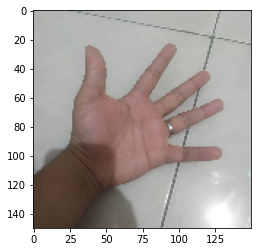

In [12]:
# Uji prediksi gambar

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  else:
    print('scissors')